    The Notebook Title: StricklandMolly_ml.ipynb
    Author: Molly Strickland
[Clicklable link to github repository](https://github.com/MoStrick/datafun-07-ml-/tree/main)


    


## Part 1 - Chart a Straight Line


In [43]:
import matplotlib

### Convert temperature

In [44]:
c = lambda f: 5 / 9 * (f - 32)


### Create function to plot and dataframe properties (graph) to plot

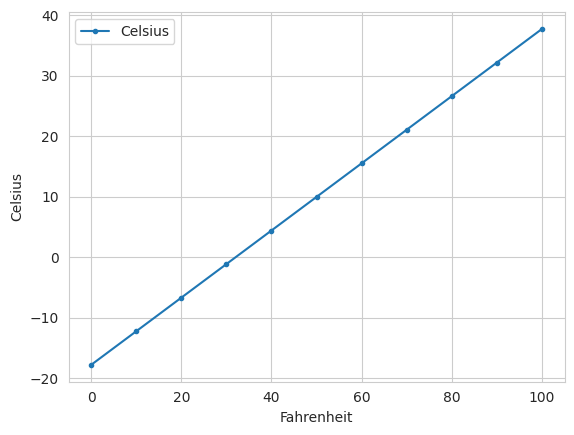

In [45]:
temps = [(f, c(f)) for f in range (0, 101,10)]
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit','Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

# Part 2

# Obtain the Data

We obtained the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series at: https://www.ncdc.noaa.gov/cag
OR file in Unit 10: ave_hi_nyc_jan_1895-2018.csv

In [46]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


# Data Cleaning
Display beginning and end of table (first and last five rows)

Rename Column

Check Data Type

Remove 01 from the dates to create just columns
    floor division performs integer division on every element of the series


In [47]:
nyc.head()
nyc.tail()

nyc.columns = ['Date','Temperature','Anomaly']
nyc.head(3)

nyc.Date.dtype

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


# Calculating basic descriptive statistis for the data set
Set the precision option correctly:   pd.set_option('display.precision', 2)


In [48]:
pd.set_option('display.precision',2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

# Creating the linear regression equation (Scipy)

In [49]:
from scipy import stats
linear_regression=stats.linregress(x=nyc.Date,y=nyc.Temperature)

round(linear_regression.slope,5)

0.01477

In [50]:
round(linear_regression.intercept,5)

8.69499

### Interpreting the linear regression equation
The object returned by linregress contains the regression line's slope and y-intercept:


# Predict future values
To predict temperature in 2019 and 1890

In [51]:
round(linear_regression.slope*2019+linear_regression.intercept,4)

38.5184

In [52]:
round(linear_regression.slope*1890+linear_regression.intercept,4)

36.6129

In [53]:
round(linear_regression.slope*2024+linear_regression.intercept,4)

38.5922

# Interpretation

# Create the scatterplot
Close the matplotlib window if you have not done so already, or it will use the existing window that already contains the graph


(10.0, 70.0)

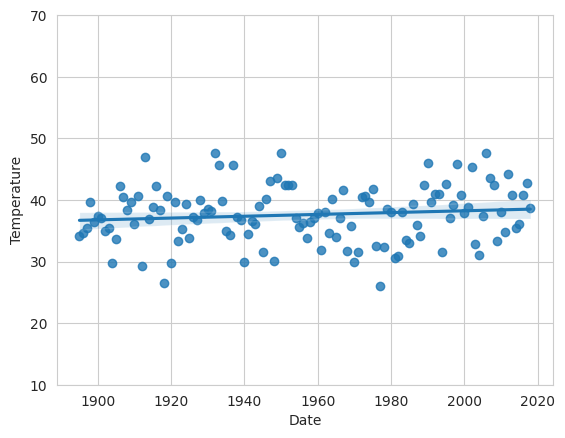

In [54]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date,y=nyc.Temperature)

axes.set_ylim(10,70)

# Observations


